In [47]:
suppressPackageStartupMessages({
    library(Seurat)
    library(celldex)
    library(ShinyCell)
    library(dplyr)
    library(SingleR)
    library(dplyr)
})

In [2]:
source("scTools/R/process.geo.data.r")

In [3]:
obj <- process.GEO.data("GSE138266")

Found 1 file(s)

GSE138266_series_matrix.txt.gz



Removed file paths:
Processing sample: GSM4104122MS19270CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104123MS58637CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104124MS71658CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104125MS49131CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104126MS60249CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104127MS74594CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104128PST83775CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104129PTC32190CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104130PST95809CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104131PTC41540CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104132PST45044CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104133PTC85037CSFGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104134MS19270PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104135MS71658PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104136MS49131PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104137MS60249PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104138MS74594PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104139PST83775PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104140PTC32190PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104141PST95809PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104142PTC41540PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Processing sample: GSM4104143PTC85037PBMCsGRCh38 


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [5]:
obj
length(obj)


$GSM4104122MS19270CSFGRCh38
An object of class Seurat 
16621 features across 4096 samples within 1 assay 
Active assay: RNA (16621 features, 0 variable features)
 1 layer present: counts

$GSM4104123MS58637CSFGRCh38
An object of class Seurat 
14428 features across 2425 samples within 1 assay 
Active assay: RNA (14428 features, 0 variable features)
 1 layer present: counts

$GSM4104124MS71658CSFGRCh38
An object of class Seurat 
15713 features across 2999 samples within 1 assay 
Active assay: RNA (15713 features, 0 variable features)
 1 layer present: counts

$GSM4104125MS49131CSFGRCh38
An object of class Seurat 
14300 features across 1401 samples within 1 assay 
Active assay: RNA (14300 features, 0 variable features)
 1 layer present: counts

$GSM4104126MS60249CSFGRCh38
An object of class Seurat 
17971 features across 7499 samples within 1 assay 
Active assay: RNA (17971 features, 0 variable features)
 1 layer present: counts

$GSM4104127MS74594CSFGRCh38
An object of class Seurat 
14273

[1] 22

In [7]:
obj <- merge(x = obj[[1]], 
                    y = c(obj[[2]], obj[[3]], obj[[4]], 
                          obj[[5]], obj[[6]], obj[[7]], 
                          obj[[8]], obj[[9]], obj[[10]], 
                          obj[[11]], obj[[12]], obj[[13]], 
                          obj[[14]], obj[[15]], obj[[16]], 
                          obj[[17]], obj[[18]], obj[[19]], 
                          obj[[20]], obj[[21]], obj[[22]]))

# Print the merged object
save(obj, file = file.path("objects", "00.rda"))

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [26]:
load(file = file.path("objects", "00.rda"))
# obj <- JoinLayers(obj)
obj[["percent.mt"]] <- PercentageFeatureSet(object = obj, pattern = "^MT-")
obj <- subset(obj, subset = nFeature_RNA > 350 & nFeature_RNA < 5000 & percent.mt < 10)
obj
save(obj, file = file.path("objects", "01.rda"))

An object of class Seurat 
20799 features across 75144 samples within 1 assay 
Active assay: RNA (20799 features, 0 variable features)
 22 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, counts.19, counts.20, counts.21, counts.22

In [ ]:
obj <- SCTransform(obj, ncells = 3000,  variable.features.n = 2000, vst.flavor="v2", method = 'glmGamPoi', conserve.memory = TRUE)
save(obj, file=file.path("objects", "02.rda"))

In [33]:
# Load annotation
monaco.ref <- celldex::MonacoImmuneData()
blueprint.ref <- celldex::BlueprintEncodeData()

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache



In [34]:
# Blueprint annnotation
sce <- LayerData(obj)
blueprint.main <- SingleR(test = sce, assay.type.test = 1, ref = blueprint.ref, labels = blueprint.ref$label.main)
obj@meta.data$blueprint.main <- blueprint.main$pruned.labels
save(obj, file=file.path("objects", "03.rda"))

In [37]:
table(obj@meta.data$blueprint.main)


      Adipocytes          B-cells     CD4+ T-cells     CD8+ T-cells 
               3             4925            24973            26237 
              DC Epithelial cells     Erythrocytes      Fibroblasts 
              47                2               81                6 
             HSC      Macrophages        Monocytes         NK cells 
             350             1556            10333             6404 

In [38]:
# Monaco annontation
sce <- LayerData(obj)
monaco.fine <- SingleR(test = sce, assay.type.test = 1, ref = monaco.ref, labels = monaco.ref$label.fine)
obj@meta.data$monaco.fine <- monaco.fine$pruned.labels
save(obj, file=file.path('objects', '04.rda'))

In [40]:
table(obj@meta.data$monaco.fine)


   Central memory CD8 T cells           Classical monocytes 
                         3343                          6285 
  Effector memory CD8 T cells             Exhausted B cells 
                          999                           297 
    Follicular helper T cells        Intermediate monocytes 
                         2685                          2603 
        Low-density basophils       Low-density neutrophils 
                           17                             1 
                   MAIT cells       Myeloid dendritic cells 
                         1613                          2412 
                Naive B cells             Naive CD4 T cells 
                         2505                          5106 
            Naive CD8 T cells          Natural killer cells 
                         2455                          5498 
      Non classical monocytes   Non-switched memory B cells 
                          491                           757 
           Non-Vd2 gd T

In [48]:
load(file=file.path('objects', '04.rda'))

In [50]:
# Clean up metadata
obj@meta.data$Tissue <- sub(".*_", "", obj@meta.data$description)
obj@meta.data$Stim <- obj@meta.data$disease.condition.ch1
obj@meta.data$Donor <- obj@meta.data$title

columns_to_keep <-  c('orig.ident', 'nCount_RNA', 'nFeature_RNA', "Donor", 'Stim', 'Tissue', "blueprint.main", 'monaco.fine')
obj@meta.data <- obj@meta.data[, columns_to_keep, drop = FALSE]
save(obj, file=file.path('objects', '05.rda'))

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 108 features requested have not been scaled (running reduction without them): IGKC, IGLC2, IGLC3, S100A12, PPBP, JCHAIN, C1QB, C1QC, PF4, SPP1, C1QA, FCER1A, IGHM, CCL3L3, APOC1, IGHA1, AL928768.3, TCL1A, HBA2, HBA1, HBD, FGFBP2, CD14, IGHD, MS4A1, VCAN, CLEC10A, IGHG3, CD1E, IGHG1, CCL3, IGHA2, FCGR3A, PTCRA, IGLC7, IL1B, CH25H, MARCO, IGLC6, LINC00926, RP5-887A10.1, TNFRSF17, DNASE1L3, VPREB3, FCGBP, VMO1, IGLL1, KLRC2, VSIG4, LINC01272, TREM2, CD9, RETN, AXL, RBP7, SERPINA1, DERL3, TPM2, RAMP1, TMEM176B, SPI1, FCRL6, KIAA0125, TSPAN13, CLEC12A, ENHO, CD24, IGLL5, ARHGAP24, TNFRSF13C, C5AR1, CDA, LILRA5, RNASE2, MAFB, FCGR2B, HMOX1, TMEM176A, PPP1R14A, BLK, CD93, CD300E, NELL2, LILRB2, XIST, LRBA, GNG11, TRH, RNASE1, SEPP1, APOE, IGHGP, NRGN, IGHG4, IGHG2, HAMP, LINC00996, HLA-DQA2, OLR1, CYP1B1, A2M, C15orf48, CD22, TTC38, MGST1, RP11-693J15.5, TNFAIP2, KLF4”
PC_ 1 
Positive:  S100A9, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40399
Number of edges: 1417103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9385
Number of communities: 26
Elapsed time: 7 seconds


Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 108 features requested have not been scaled (running reduction without them): IGKC, IGLC2, IGLC3, S100A12, PPBP, JCHAIN, C1QB, C1QC, PF4, SPP1, C1QA, FCER1A, IGHM, CCL3L3, APOC1, IGHA1, AL928768.3, TCL1A, HBA2, HBA1, HBD, FGFBP2, CD14, IGHD, MS4A1, VCAN, CLEC10A, IGHG3, CD1E, IGHG1, CCL3, IGHA2, FCGR3A, PTCRA, IGLC7, IL1B, CH25H, MARCO, IGLC6, LINC00926, RP5-887A10.1, TNFRSF17, DNASE1L3, VPREB3, FCGBP, VMO1, IGLL1, KLRC2, VSIG4, LINC01272, TREM2, CD9, RETN, AXL, RBP7, SERPINA1, DERL3, TPM2, RAMP1, TMEM176B, SPI1, FCRL6, KIAA0125, TSPAN13, CLEC12A, ENHO, CD24, IGLL5, ARHGAP24, TNFRSF13C, C5AR1, CDA, LILRA5, RNASE2, MAFB, FCGR2B, HMOX1, TMEM176A, PPP1R14A, BLK, CD93, CD300E, NELL2, LILRB2, XIST, LRBA, GNG11, TRH, RNASE1, SEPP1, APOE, IGHGP, NRGN, IGHG4, IGHG2, HAMP, LINC00996, HLA-DQA2, OLR1, CYP1B1, A2M, C15orf48, CD22, TTC38, MGST1, RP11-693J15.5, TNFAIP2, KLF4”
PC_ 1 
Positive:  HLA-DRA,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 34745
Number of edges: 1091727

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8809
Number of communities: 16
Elapsed time: 7 seconds


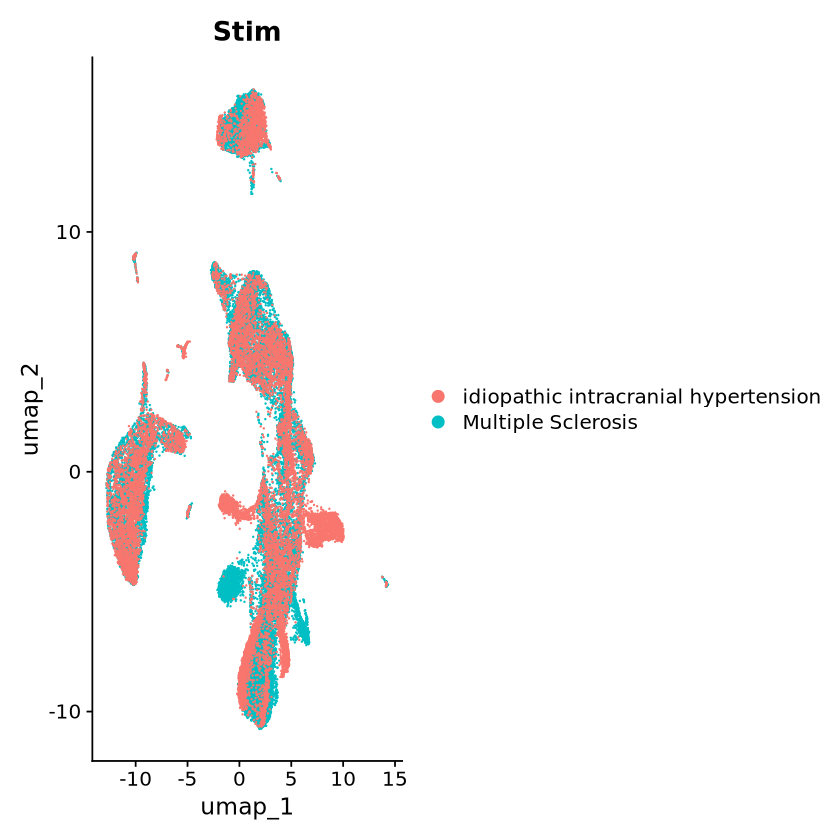

In [58]:
# Visualization
pbmc <- subset(obj, subset = Tissue == "PBMC")
pbmc <- RunPCA(pbmc, npcs = 30, verbose = TRUE)
pbmc <- RunUMAP(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.5)
DimPlot(pbmc, group.by = "Stim")
save(pbmc, file=file.path("objects", "pbmc.rda"))

csf <- subset(obj, subset = Tissue == "CSF")
csf <- RunPCA(csf, npcs = 30, verbose = TRUE)
csf <- RunUMAP(csf, reduction = "pca", dims = 1:20)
csf <- FindNeighbors(csf, reduction = "pca", dims = 1:20)
csf <- FindClusters(csf, resolution = 0.5)
save(csf, file=file.path("objects", "csf.rda"))

In [59]:
### Write shiny files

# PBMC
seu =  pbmc
scConf1 = createConfig(seu)
makeShinyFiles(seu, scConf1,
             gene.mapping = TRUE,
             shiny.prefix = "sc1",
             shiny.dir = "csf_pbmc_ms_scRNAseq_GSE138266/",
             gex.assay = "SCT")

# Brain
seu =  csf
scConf2 = createConfig(seu)
makeShinyFiles(seu, scConf2,
             gene.mapping = TRUE,
             shiny.prefix = "sc2",
             shiny.dir = "csf_pbmc_ms_scRNAseq_GSE138266/",
             gex.assay = "SCT")

ID,UI,fID,fCL,fRow,grp,dimred
<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
orig.ident,orig.ident,SeuratProject,black,1,FALSE,FALSE
nCount_RNA,nCount_RNA,NA,NA,NA,FALSE,FALSE
nFeature_RNA,nFeature_RNA,NA,NA,NA,FALSE,FALSE
Donor,Donor,MS19270_PBMC|MS49131_PBMC|MS60249_PBMC|MS71658_PBMC|MS74594_PBMC|PST83775_PBMC|PST95809_PBMC|PTC32190_PBMC|PTC41540_PBMC|PTC85037_PBMC,#A6CEE3|#3F8EAA|#79C360|#B89B74|#E52829|#FDB762|#ED8F47|#9471B4|#DDD399|#B15928,3,TRUE,FALSE
Stim,Stim,idiopathic intracranial hypertension|Multiple Sclerosis,#A6CEE3|#B15928,1,TRUE,FALSE
Tissue,Tissue,PBMC,black,1,FALSE,FALSE
blueprint.main,blueprint.main,B-cells|CD4+ T-cells|CD8+ T-cells|DC|Erythrocytes|HSC|Macrophages|Monocytes|NK cells,#A6CEE3|#569EA4|#52AF43|#F88A89|#F06C45|#FE870D|#B294C7|#C7B699|#B15928,3,TRUE,FALSE
monaco.fine,monaco.fine,Central memory CD8 T cells|Classical monocytes|Effector memory CD8 T cells|Exhausted B cells|Follicular helper T cells|Intermediate monocytes|Low-density basophils|Low-density neutrophils|MAIT cells|Myeloid dendritic cells|Naive B cells|Naive CD4 T cells|Naive CD8 T cells|Natural killer cells|Non classical monocytes|Non-switched memory B cells|Non-Vd2 gd T cells|Plasmablasts|Plasmacytoid dendritic cells|Progenitor cells|Switched memory B cells|T regulatory cells|Terminal effector CD4 T cells|Terminal effector CD8 T cells|Th1 cells|Th1/Th17 cells|Th17 cells|Th2 cells|Vd2 gd T cells,#A6CEE3|#70ACD0|#3B8ABE|#398AAC|#72B29C|#ACDB8B|#84C868|#52AF43|#4F9F3B|#9E9C66|#EC9A91|#F37070|#E93E3F|#E52B24|#F06C45|#FAAD66|#FDAC4F|#FE9323|#FB820F|#E69663|#D1AAB7|#B294C7|#8C66AF|#6F4399|#A99099|#E4DC99|#EEDB80|#CF9A54|#B15928,8,TRUE,FALSE
SCT_snn_res.0.5,SCT_snn_res.0.5,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25,#A6CEE3|#6AA8CE|#2F82B9|#4E98A6|#8EC694|#98D277|#60B64D|#439F34|#9B9C64|#F29A94|#F16667|#E62E30|#EA4833|#F59057|#FDB45D|#FE982C|#FC8108|#E59766|#CEADC4|#A787C0|#7D54A5|#8D6B99|#CFC099|#F5EB8B|#D3A259|#B15928,7,TRUE,FALSE


ID,UI,fID,fCL,fRow,grp,dimred
<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
orig.ident,orig.ident,SeuratProject,black,1,FALSE,FALSE
nCount_RNA,nCount_RNA,NA,NA,NA,FALSE,FALSE
nFeature_RNA,nFeature_RNA,NA,NA,NA,FALSE,FALSE
Donor,Donor,MS19270_CSF|MS49131_CSF|MS58637_CSF|MS60249_CSF|MS71658_CSF|MS74594_CSF|PST83775_CSF|PST95809_CSF|PTC32190_CSF|PTC41540_CSF|PTC45044_CSF|PTC85037_CSF,#A6CEE3|#1F78B4|#B2DF8A|#33A02C|#FB9A99|#E31A1C|#FDBF6F|#FF7F00|#CAB2D6|#6A3D9A|#FFFF99|#B15928,3,TRUE,FALSE
Stim,Stim,idiopathic intracranial hypertension|Multiple Sclerosis,#A6CEE3|#B15928,1,TRUE,FALSE
Tissue,Tissue,CSF,black,1,FALSE,FALSE
blueprint.main,blueprint.main,Adipocytes|B-cells|CD4+ T-cells|CD8+ T-cells|DC|Epithelial cells|Fibroblasts|HSC|Macrophages|Monocytes|NK cells,#A6CEE3|#2D82AF|#98D277|#6F9E4C|#F16667|#F06C45|#FE982C|#D9A295|#7D54A5|#F0EB99|#B15928,3,TRUE,FALSE
monaco.fine,monaco.fine,Central memory CD8 T cells|Classical monocytes|Effector memory CD8 T cells|Exhausted B cells|Follicular helper T cells|Intermediate monocytes|MAIT cells|Myeloid dendritic cells|Naive B cells|Naive CD4 T cells|Naive CD8 T cells|Natural killer cells|Non classical monocytes|Non-switched memory B cells|Non-Vd2 gd T cells|Plasmablasts|Plasmacytoid dendritic cells|Progenitor cells|Switched memory B cells|T regulatory cells|Terminal effector CD4 T cells|Terminal effector CD8 T cells|Th1 cells|Th1/Th17 cells|Th17 cells|Th2 cells|Vd2 gd T cells,#A6CEE3|#6CA9CF|#3385BB|#4693A8|#84BF96|#A3D77F|#6DBD57|#37A22F|#7F9D55|#D49B84|#F57C7C|#EB4647|#E42622|#F06C45|#FBB268|#FDA848|#FE8D19|#F48829|#DE9E83|#C6ADD3|#9D7BBA|#754AA0|#977899|#D6CA99|#F3E587|#D29F57|#B15928,7,TRUE,FALSE
SCT_snn_res.0.5,SCT_snn_res.0.5,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15,#A6CEE3|#438EC0|#63A8A0|#98D277|#3BA432|#B89B74|#F16667|#E62F27|#F9A963|#FE982C|#ED8F47|#C3AAD2|#7D54A5|#B9A499|#EAD27A|#B15928,4,TRUE,FALSE


In [60]:
makeShinyCodesMulti(
  shiny.title = "CSF and PBMC During  Multiple Sclerosis", shiny.footnotes = NULL,
  shiny.prefix = c("sc1", "sc2"),
  shiny.headers = c("PBMC", "CSF"), 
  shiny.dir = "csf_pbmc_ms_scRNAseq_GSE138266/") 

In [61]:
system("R -e \"shiny::runApp('csf_pbmc_ms_scRNAseq_GSE138266')\"")